<a href="https://colab.research.google.com/github/rrishabhchoudhary/AirQualityIndexPrediction/blob/main/AirQualityIndexPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

import datetime
from sklearn.tree import DecisionTreeRegressor

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## EDA

In [3]:
df = pd.read_csv("/content/drive/MyDrive/city_day.csv")

In [4]:

df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
len(df['City'].unique())

26

In [6]:
l=df['City'].value_counts().head(10).index

In [7]:
l

Index(['Ahmedabad', 'Delhi', 'Mumbai', 'Bengaluru', 'Lucknow', 'Chennai',
       'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [9]:
df[["Year","Month","Day"]] = df["Date"].str.split("-",expand=True)
df["Year"] = df["Year"].astype(int)
df["Day"] = df["Day"].astype(int)
dict = {
            'Jan': 1,
            'Feb': 2,
            'Mar': 3,
            'Apr': 4,
            'May': 5,
            'Jun': 6,
            'Jul': 7,
            'Aug': 8,
            'Sep': 9,
            'Oct': 10,
            'Nov': 11,
            'Dec': 12
    }
df["Month"].replace(dict,inplace=True)
df=df.drop(["Date","AQI_Bucket"],axis=1)
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year,Month,Day
0,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,2015,01,1
1,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,2015,01,2
2,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,2015,01,3
3,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,2015,01,4
4,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,2015,01,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,2020,06,27
29527,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,2020,06,28
29528,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,2020,06,29
29529,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,2020,06,30


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     29531 non-null  object 
 1   PM2.5    24933 non-null  float64
 2   PM10     18391 non-null  float64
 3   NO       25949 non-null  float64
 4   NO2      25946 non-null  float64
 5   NOx      25346 non-null  float64
 6   NH3      19203 non-null  float64
 7   CO       27472 non-null  float64
 8   SO2      25677 non-null  float64
 9   O3       25509 non-null  float64
 10  Benzene  23908 non-null  float64
 11  Toluene  21490 non-null  float64
 12  Xylene   11422 non-null  float64
 13  AQI      24850 non-null  float64
 14  Year     29531 non-null  int64  
 15  Month    29531 non-null  object 
 16  Day      29531 non-null  int64  
dtypes: float64(13), int64(2), object(2)
memory usage: 3.8+ MB


## Numerical Features

In [11]:
Numerical_features=[features for features in df.columns if df[features].dtype!='O']

In [12]:
Numerical_features

['PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene',
 'AQI',
 'Year',
 'Day']

In [13]:
Categorical_features=[features for features in df.columns if features not in Numerical_features]

In [14]:
Categorical_features

['City', 'Month']

In [15]:
for features in Categorical_features:
    print(f"No of unique values in {features}:{len(df[features].unique())}")

No of unique values in City:26
No of unique values in Month:12


## Missing Values:

In [16]:
df.isnull().sum()

City           0
PM2.5       4598
PM10       11140
NO          3582
NO2         3585
NOx         4185
NH3        10328
CO          2059
SO2         3854
O3          4022
Benzene     5623
Toluene     8041
Xylene     18109
AQI         4681
Year           0
Month          0
Day            0
dtype: int64

In [17]:
df.shape

(29531, 17)

In [18]:
for features in df.columns:
    print(f"The percentage of null values of {features} is :  {round(df[features].isnull().sum()/df.shape[0],2)}")

The percentage of null values of City is :  0.0
The percentage of null values of PM2.5 is :  0.16
The percentage of null values of PM10 is :  0.38
The percentage of null values of NO is :  0.12
The percentage of null values of NO2 is :  0.12
The percentage of null values of NOx is :  0.14
The percentage of null values of NH3 is :  0.35
The percentage of null values of CO is :  0.07
The percentage of null values of SO2 is :  0.13
The percentage of null values of O3 is :  0.14
The percentage of null values of Benzene is :  0.19
The percentage of null values of Toluene is :  0.27
The percentage of null values of Xylene is :  0.61
The percentage of null values of AQI is :  0.16
The percentage of null values of Year is :  0.0
The percentage of null values of Month is :  0.0
The percentage of null values of Day is :  0.0


## Distribution of Numerical Features

<ipython-input-19-a7f99e20a00f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


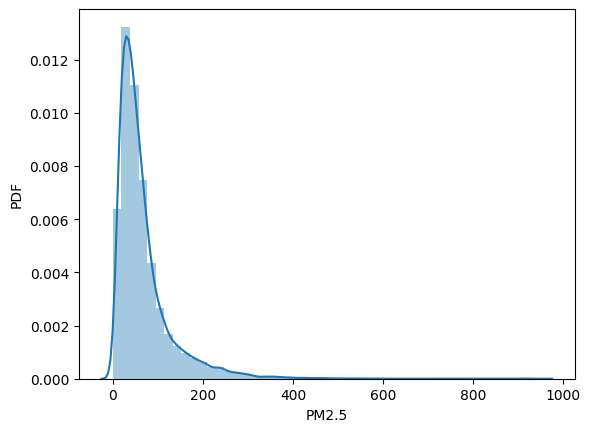

<ipython-input-19-a7f99e20a00f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


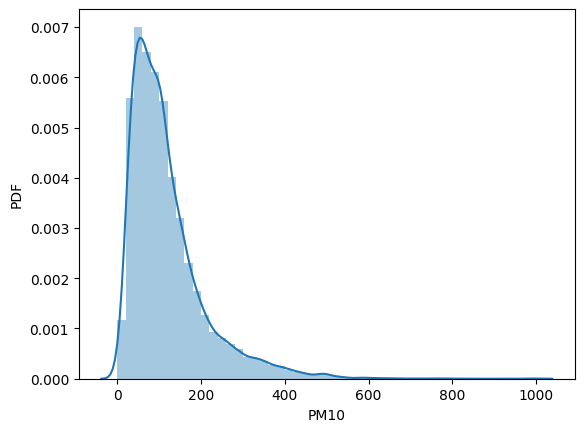

<ipython-input-19-a7f99e20a00f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


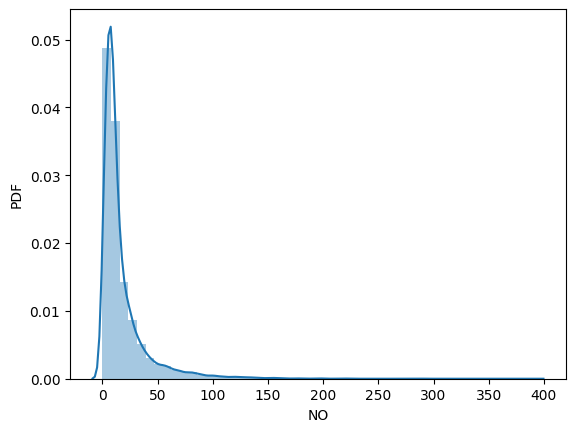

<ipython-input-19-a7f99e20a00f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


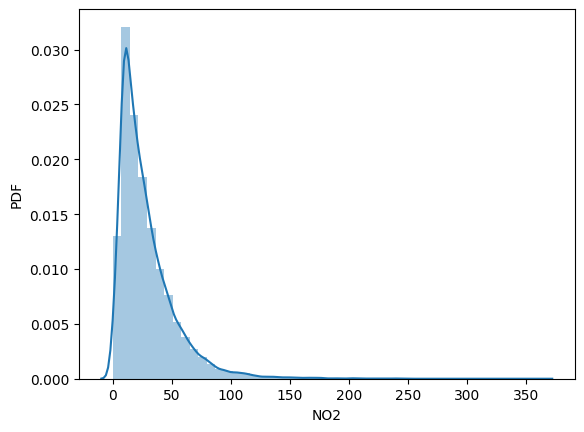

<ipython-input-19-a7f99e20a00f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


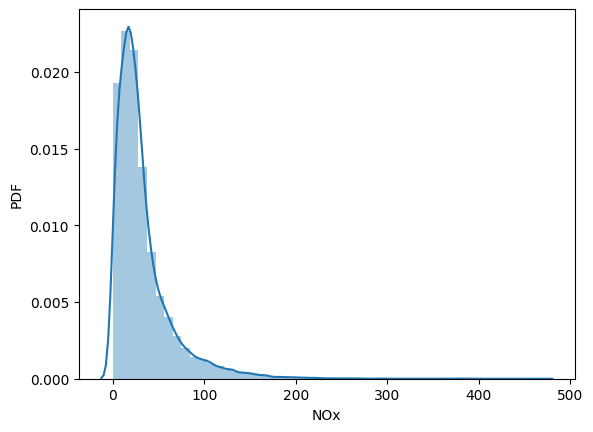

<ipython-input-19-a7f99e20a00f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


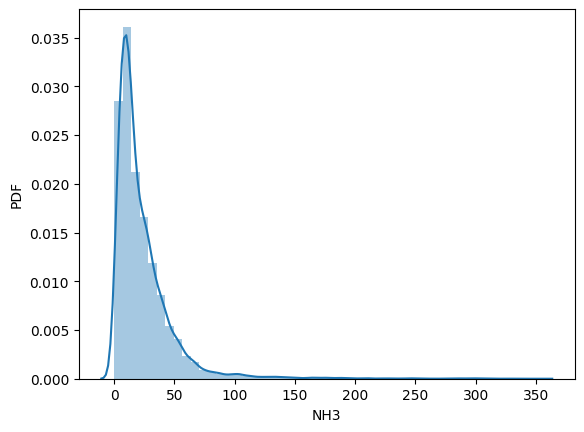

<ipython-input-19-a7f99e20a00f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


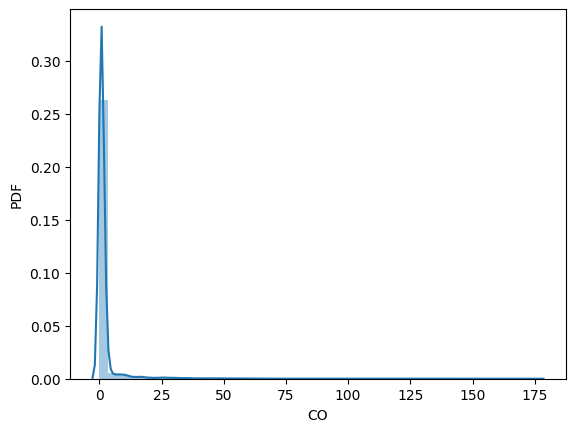

<ipython-input-19-a7f99e20a00f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


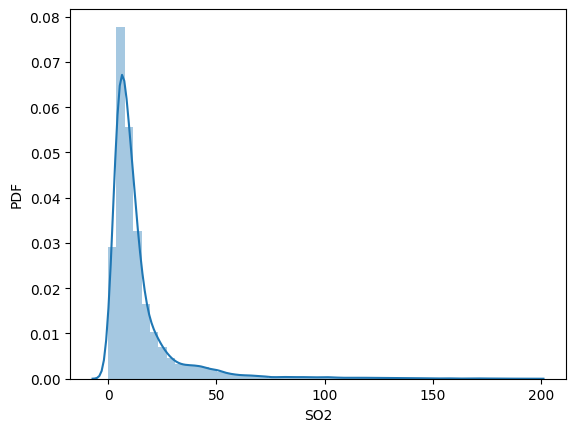

<ipython-input-19-a7f99e20a00f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


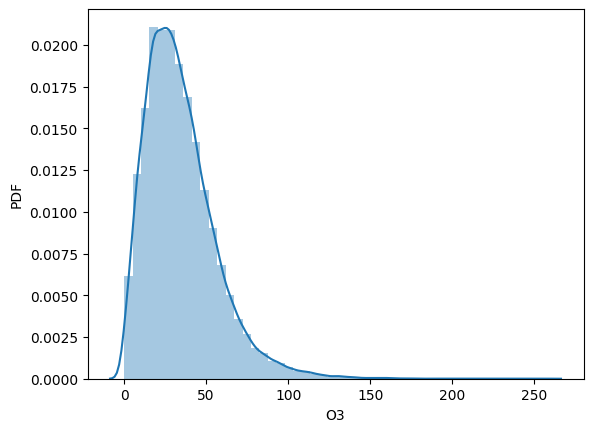

<ipython-input-19-a7f99e20a00f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


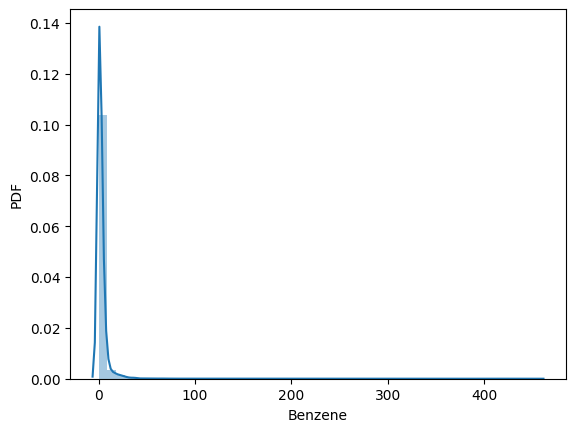

<ipython-input-19-a7f99e20a00f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


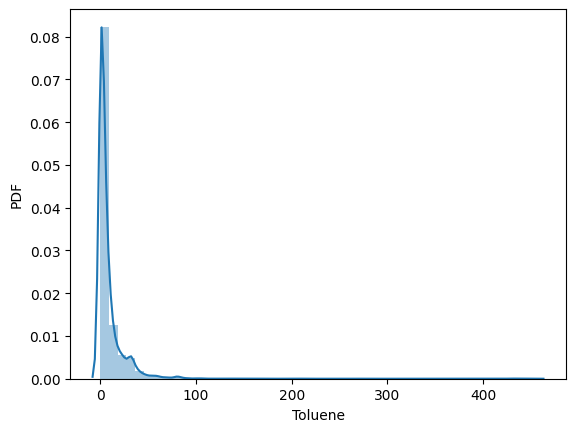

<ipython-input-19-a7f99e20a00f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


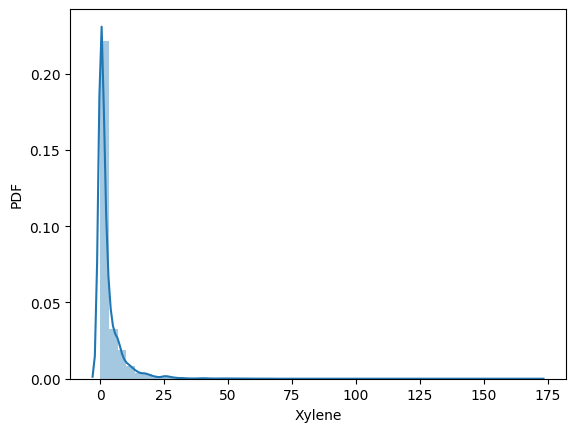

<ipython-input-19-a7f99e20a00f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


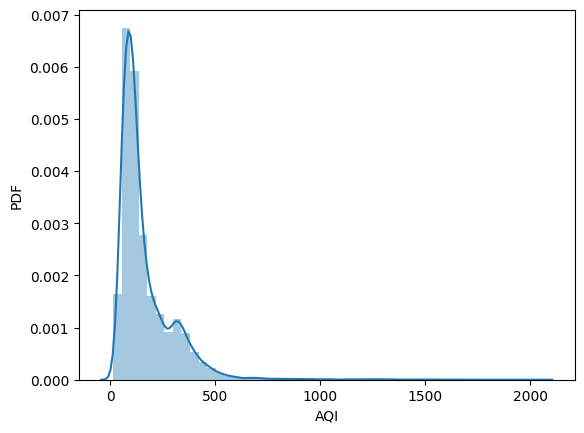

<ipython-input-19-a7f99e20a00f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


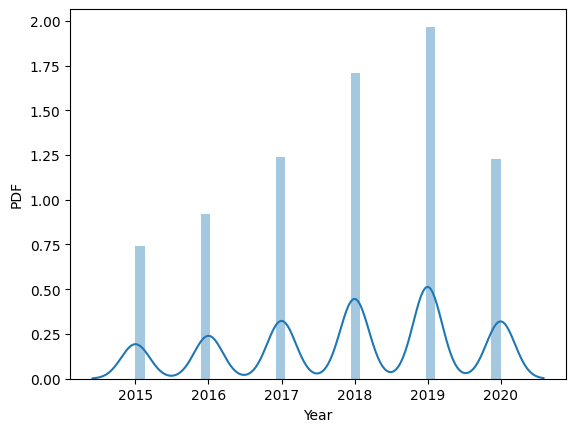

<ipython-input-19-a7f99e20a00f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


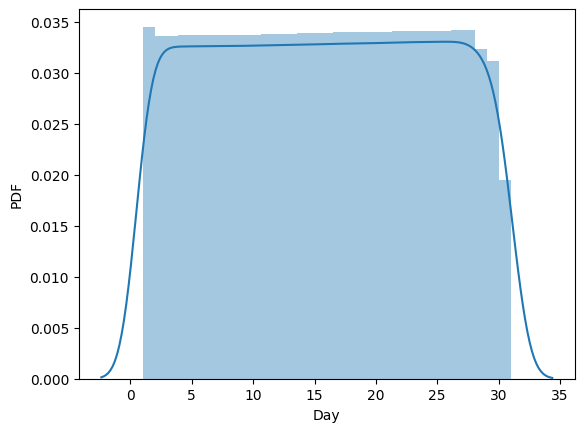

In [19]:
for features in Numerical_features:
    sns.distplot(df[features])
    plt.xlabel(features)
    plt.ylabel('PDF')
    plt.show()

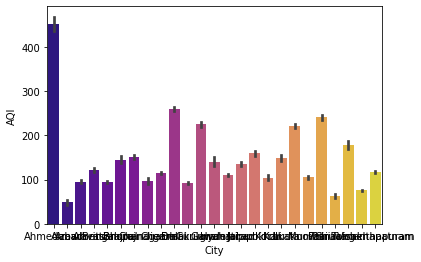

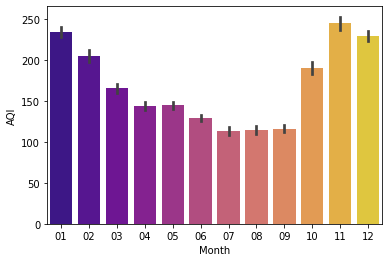

In [ ]:
for features in Categorical_features:
    sns.barplot(x =features, y ='AQI', data = df, palette ='plasma')
    plt.show()


## outliers

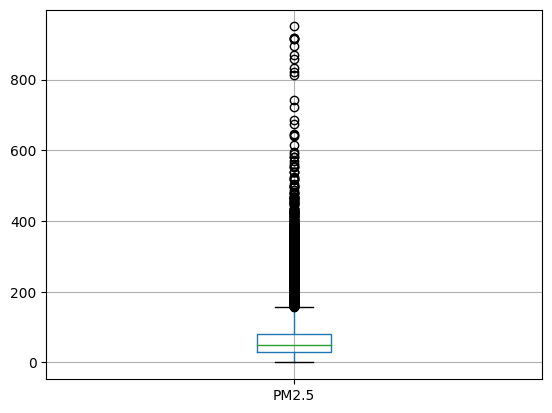

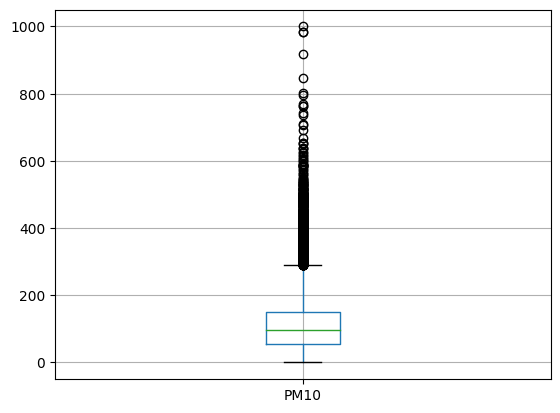

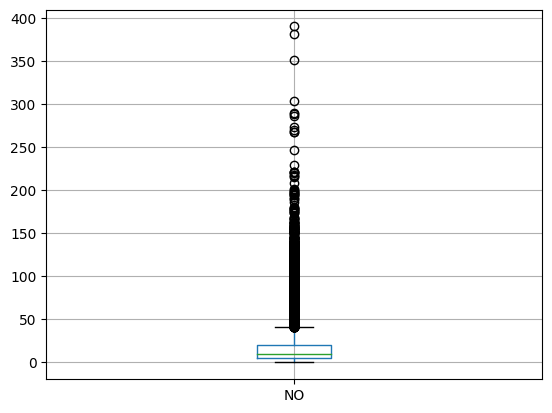

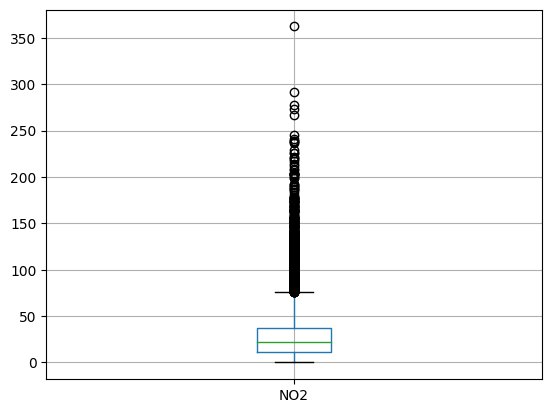

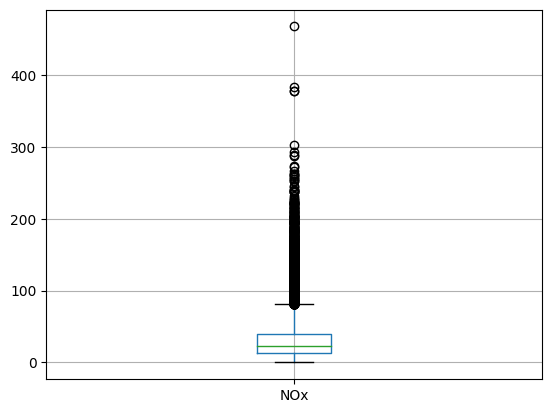

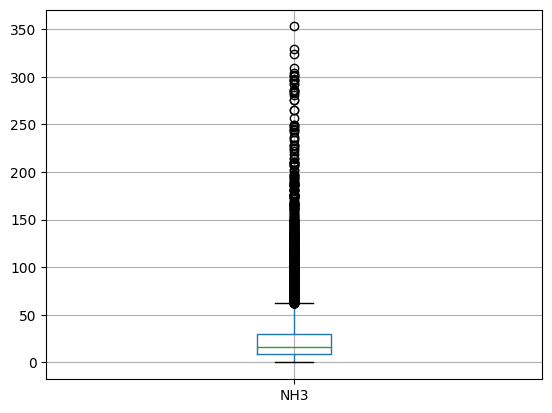

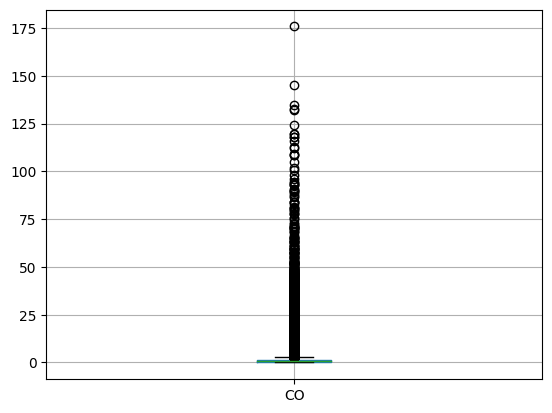

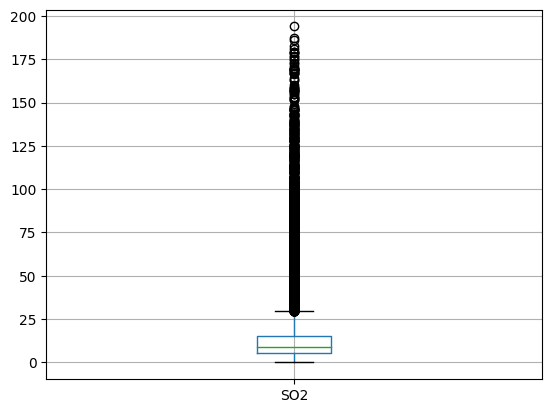

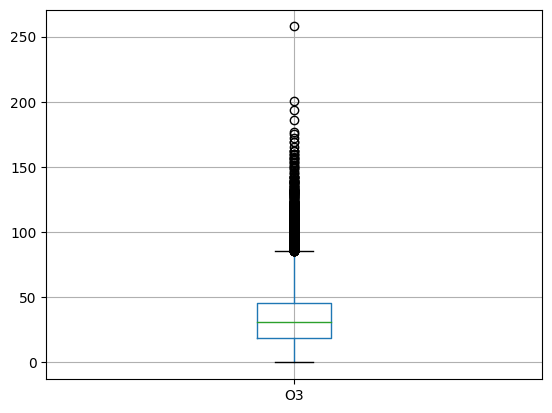

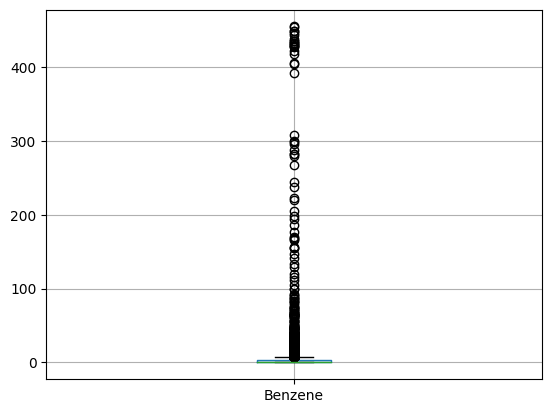

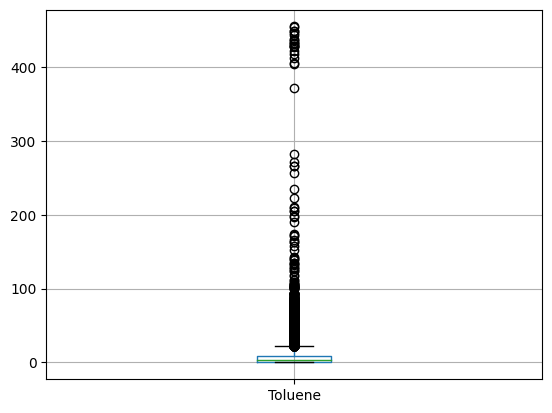

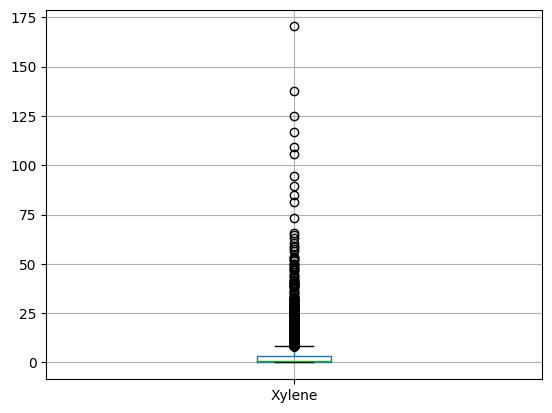

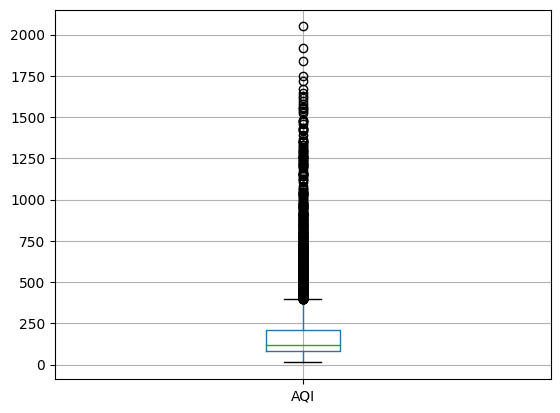

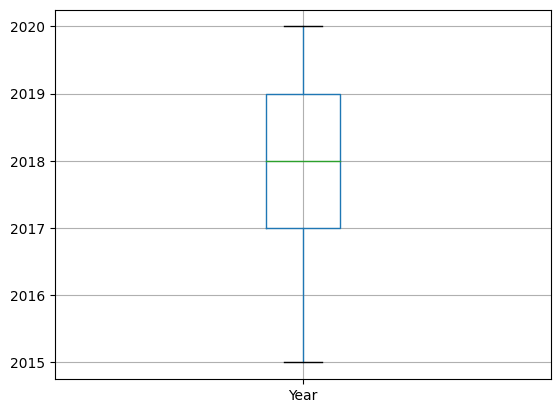

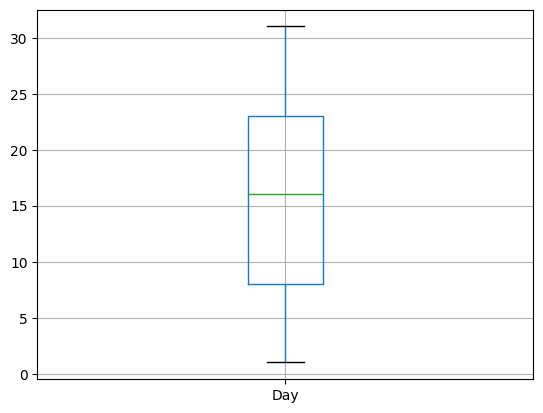

In [20]:
for features in Numerical_features:
    df.boxplot(column=features)
    plt.show()

In [21]:
for features in Numerical_features:
    q3=df[features].quantile(0.75)
    q1=df[features].quantile(0.25)
    IQR=q3-q1
    max_range=q3+(1.5*IQR)
    min_range=q1-(1.5*IQR)
    df.loc[df[features]>max_range,features]=max_range

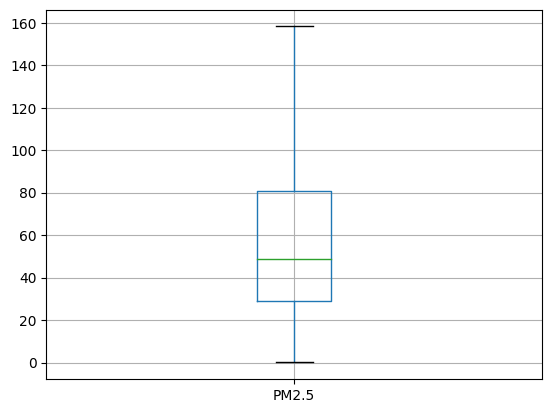

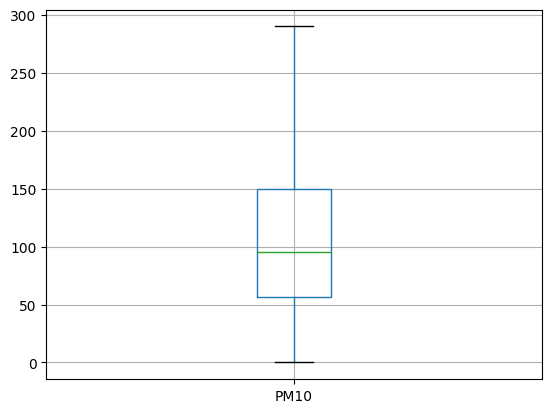

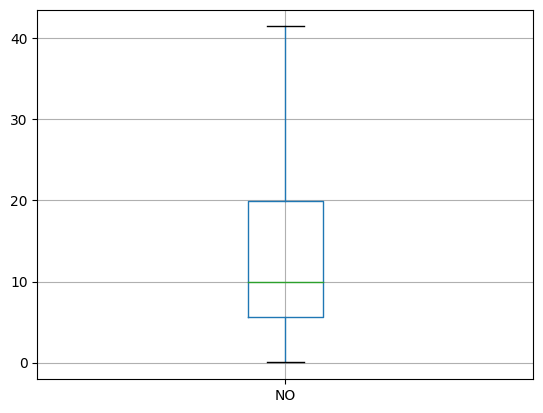

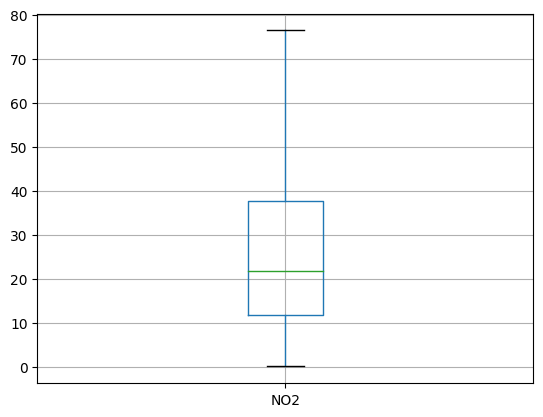

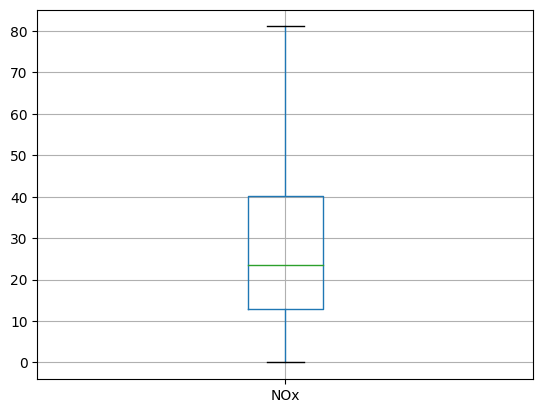

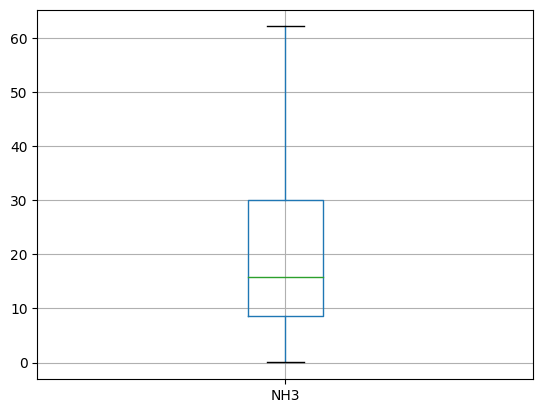

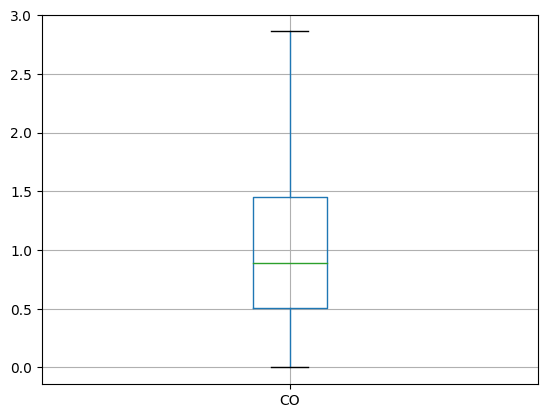

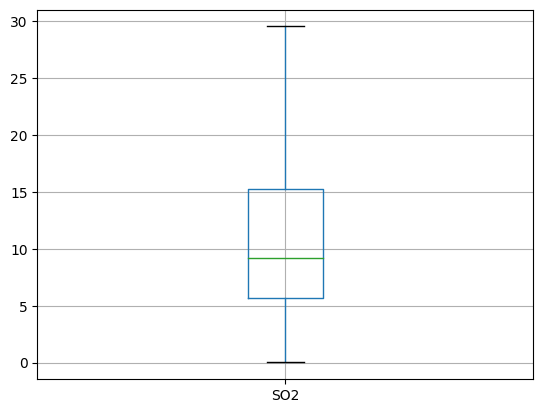

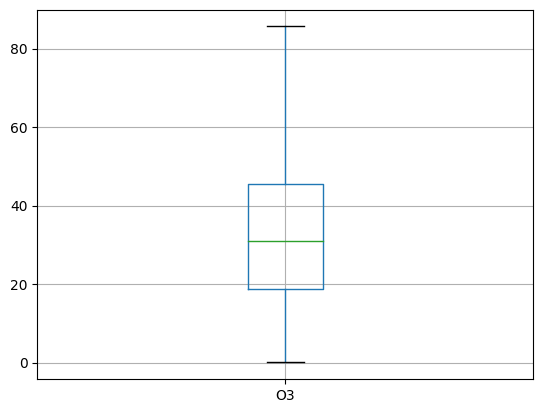

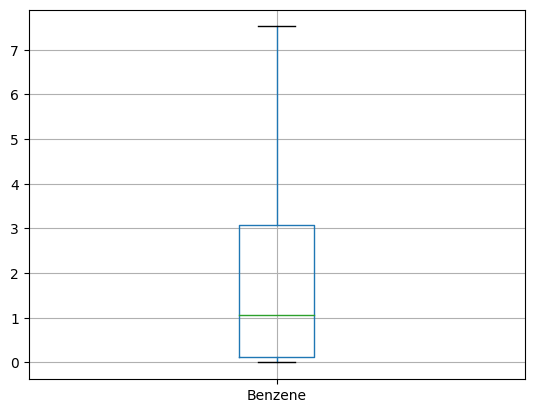

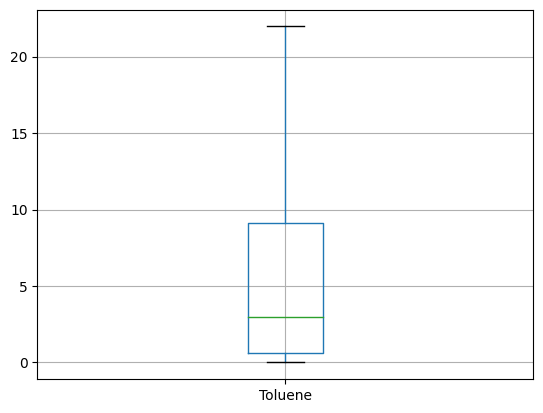

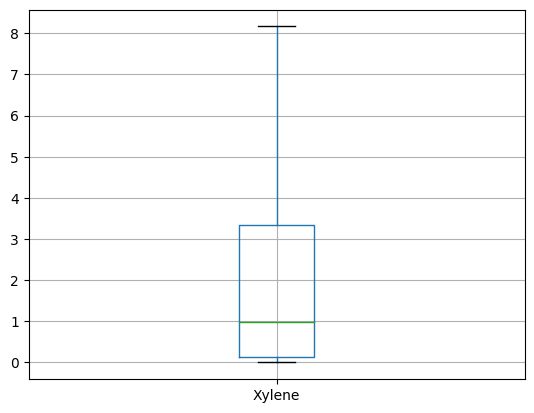

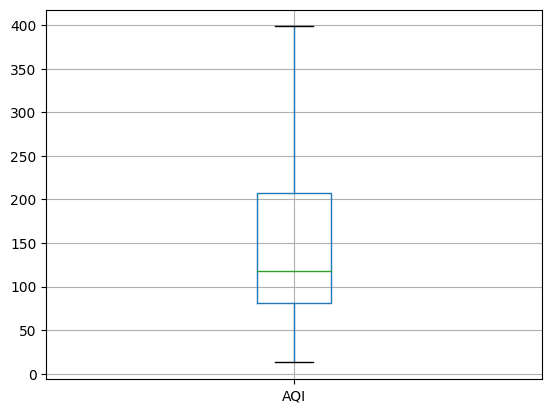

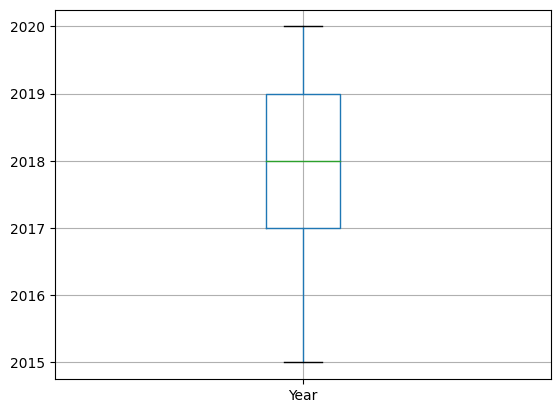

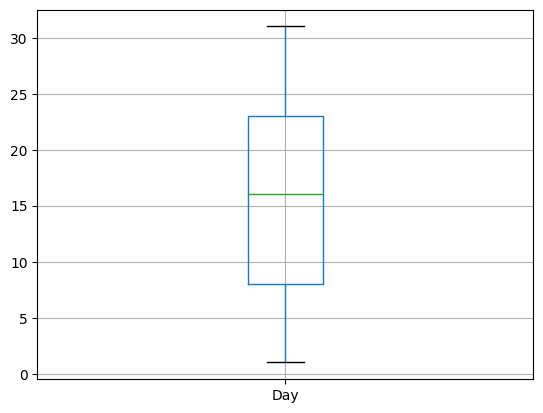

In [22]:
for features in Numerical_features:
    df.boxplot(column=features)
    plt.show()

In [23]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'Year', 'Month', 'Day'],
      dtype='object')

In [24]:
#sns.pairplot(df)

## FEATURE ENGINEERING

In [25]:
for features in df.columns:
    df[features].fillna(df[features].mode(),inplace=True)

In [26]:

df['PM2.5'].median()
df['PM10'].median()
df['NO'].median()
df['NO2'].median()
df['NOx'].median()
df['NH3'].median()
df['CO'].median()
df['SO2'].median()
df['O3'].median()
df['Benzene'].median()
df['Toluene'].median()
df['Xylene'].median()
df['AQI'].median()
df['PM2.5'].fillna(df['PM2.5'].median(),inplace=True)
df['PM10'].fillna(df['PM10'].median(),inplace=True)
df['NO'].fillna(df['NO'].median(),inplace=True)
df['NO2'].fillna(df['NO2'].median(),inplace=True)
df['NOx'].fillna(df['NOx'].median(),inplace=True)
df['NH3'].fillna(df['NH3'].median(),inplace=True)
df['CO'].fillna(df['CO'].median(),inplace=True)
df['SO2'].fillna(df['SO2'].median(),inplace=True)
df['O3'].fillna(df['O3'].median(),inplace=True)
df['Benzene'].fillna(df['Benzene'].median(),inplace=True)
df['Toluene'].fillna(df['Toluene'].median(),inplace=True)
df['Xylene'].fillna(df['Xylene'].median(),inplace=True)
df['AQI'].fillna(df['AQI'].median(),inplace=True)

df.isnull().sum()

City       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
Year       0
Month      0
Day        0
dtype: int64

In [27]:
## SCALING
## MIN_MAX_SCALER
## STANDARDSCALER

In [28]:
df.shape

(29531, 17)

In [29]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PM2.5,29531.0,59.194116,39.598066,0.04,32.150,48.570,72.460,158.24500
PM10,29531.0,106.398801,58.769076,0.01,79.315,95.685,111.885,289.98000
NO,29531.0,13.947850,11.578386,0.02,6.210,9.890,17.570,41.43000
NO2,29531.0,26.583275,18.547103,0.01,12.980,21.690,34.665,76.42500
NOx,29531.0,28.686210,21.154465,0.00,14.670,23.520,36.015,81.08875
NH3,29531.0,19.436989,13.713201,0.01,12.040,15.855,21.760,62.18000
CO,29531.0,1.066301,0.788434,0.00,0.540,0.890,1.380,2.86000
SO2,29531.0,11.406000,7.714675,0.01,6.090,9.160,13.810,29.54500
O3,29531.0,33.531985,18.503440,0.01,20.740,30.840,42.730,85.63500
Benzene,29531.0,1.811726,2.110410,0.00,0.240,1.070,2.420,7.52000


In [30]:
df = pd.get_dummies(df, columns = ['City'])

In [31]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,...,City_Jorapokhar,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam
count,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,...,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,59.194116,106.398801,13.947850,26.583275,28.686210,19.436989,1.066301,11.406000,33.531985,1.811726,...,0.039586,0.005486,0.027564,0.068030,0.068030,0.062917,0.010497,0.031323,0.037655,0.049507
std,39.598066,58.769076,11.578386,18.547103,21.154465,13.713201,0.788434,7.714675,18.503440,2.110410,...,0.194987,0.073864,0.163723,0.251802,0.251802,0.242818,0.101920,0.174192,0.190365,0.216928
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.150000,79.315000,6.210000,12.980000,14.670000,12.040000,0.540000,6.090000,20.740000,0.240000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.570000,95.685000,9.890000,21.690000,23.520000,15.855000,0.890000,9.160000,30.840000,1.070000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,72.460000,111.885000,17.570000,34.665000,36.015000,21.760000,1.380000,13.810000,42.730000,2.420000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,158.245000,289.980000,41.430000,76.425000,81.088750,62.180000,2.860000,29.545000,85.635000,7.520000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PM2.5                    29531 non-null  float64
 1   PM10                     29531 non-null  float64
 2   NO                       29531 non-null  float64
 3   NO2                      29531 non-null  float64
 4   NOx                      29531 non-null  float64
 5   NH3                      29531 non-null  float64
 6   CO                       29531 non-null  float64
 7   SO2                      29531 non-null  float64
 8   O3                       29531 non-null  float64
 9   Benzene                  29531 non-null  float64
 10  Toluene                  29531 non-null  float64
 11  Xylene                   29531 non-null  float64
 12  AQI                      29531 non-null  float64
 13  Year                     29531 non-null  int64  
 14  Month                 

In [33]:
df.corr()

<ipython-input-33-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,...,City_Jorapokhar,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam
PM2.5,1.000000,0.609002,0.469550,0.450887,0.430410,0.271921,0.355816,0.239869,0.210968,0.230318,...,-0.028849,-0.052078,-0.000956,0.221954,-0.108094,0.196252,-0.077964,-0.010351,-0.151774,-0.069580
PM10,0.609002,1.000000,0.457031,0.410476,0.453417,0.292519,0.218674,0.292885,0.213299,0.263782,...,0.079961,-0.049367,0.012114,-0.049255,-0.047418,-0.033159,-0.099954,0.098200,-0.175271,-0.008334
NO,0.469550,0.457031,1.000000,0.516798,0.759342,0.239214,0.354649,0.323782,-0.015397,0.301810,...,-0.055980,0.149974,0.041005,-0.009647,0.055389,0.187895,-0.100729,0.105308,-0.176203,-0.037480
NO2,0.450887,0.410476,0.516798,1.000000,0.619685,0.292982,0.287628,0.319043,0.311490,0.376086,...,-0.157579,-0.045810,0.094243,0.089803,-0.050676,0.089953,-0.112334,-0.106987,-0.179820,0.095557
NOx,0.430410,0.453417,0.759342,0.619685,1.000000,0.224798,0.315292,0.275308,0.075559,0.323911,...,-0.049581,0.109321,0.144638,-0.081941,0.161477,0.118625,-0.123122,-0.003124,-0.189674,-0.038886
NH3,0.271921,0.292519,0.239214,0.292982,0.224798,1.000000,0.122974,0.001868,0.116472,0.131500,...,-0.142797,-0.057669,-0.013807,0.059040,-0.078386,-0.062796,-0.106216,-0.092451,-0.191540,-0.129037
CO,0.355816,0.218674,0.354649,0.287628,0.315292,0.122974,1.000000,0.334061,0.061713,0.229252,...,-0.078611,0.021701,-0.057074,0.164128,-0.170662,0.122447,-0.098946,0.132103,-0.032175,-0.094214
SO2,0.239869,0.292885,0.323782,0.319043,0.275308,0.001868,0.334061,1.000000,0.209922,0.200743,...,0.159969,0.059593,-0.066186,-0.107335,-0.003013,0.151014,-0.057932,0.204171,-0.145224,0.012726
O3,0.210968,0.213299,-0.015397,0.311490,0.075559,0.116472,0.061713,0.209922,1.000000,0.112701,...,-0.025187,-0.119263,-0.026004,0.040344,-0.028011,0.025573,-0.028073,-0.134804,0.010851,0.020460
Benzene,0.230318,0.263782,0.301810,0.376086,0.323911,0.131500,0.229252,0.200743,0.112701,1.000000,...,-0.071355,-0.026103,0.259996,-0.004135,-0.098124,-0.046121,-0.032577,-0.126243,-0.069524,0.206382


In [34]:
x=df.drop(['AQI'],axis=1)
y=df['AQI']

In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(Y_train.shape)

(23624, 41)
(23624,)


## RANDOMFOREST

In [36]:
clf=RandomForestRegressor()

In [37]:
clf.fit(X_train,Y_train)

RandomForestRegressor()

In [38]:
score=clf.score(X_test,Y_test)

In [39]:
score

0.9035434187262275

In [40]:
Y_true=clf.predict(X_test)

In [41]:
error=mean_squared_error(Y_test,Y_true)

In [42]:
error

890.9475388860674

In [43]:
er=mean_absolute_error(Y_test,Y_true)

In [44]:
er

16.90421703064161

## LINEAR REGRESSION

In [45]:
model2=LinearRegression()

In [46]:
model2.fit(X_train,Y_train)

LinearRegression()

In [47]:
score=model2.score(X_test,Y_test)

In [48]:
score

0.817730570690615

In [49]:
y_pred=model2.predict(X_test)

In [50]:
error2=mean_squared_error(Y_test,y_pred)

In [51]:
error2

1683.5813307175615

## DECISIONTREE

In [52]:
model3=DecisionTreeRegressor()

In [53]:
model3.fit(X_train,Y_train)

DecisionTreeRegressor()

In [54]:
score=model3.score(X_test,Y_test)

In [55]:
score

0.8111438556225037

In [56]:
y_pred=model3.predict(X_test)

In [57]:
error3=mean_squared_error(Y_test,y_pred)

In [58]:
error3

1744.421322160149

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
